In [1]:
%matplotlib notebook
from beam_solver.data import DATA_PATH
import catdata as cd
import beamsolve as bs
import beam_utils as bt
import nose.tools as nt
import numpy as np
import aipy
import os
import copy
import pylab
from collections import OrderedDict
import time
import linsolve
%load_ext autoreload

In [2]:
catd_xx = cd.catData()
catd_xx.read_hdf5('srcd_xx.h5')

catd_yy = cd.catData()
catd_yy.read_hdf5('srcd_yy.h5')

In [3]:
beamfits = os.path.join(DATA_PATH, 'HERA_NF_dipole_power.beamfits')
beam_xx = bt.get_fitsbeam(beamfits, 151e6, 'xx')
beam_yy = bt.get_fitsbeam(beamfits, 151e6, 'yy')

In [4]:
catalog_flux_xx = catd_xx.calc_catalog_flux(beam_xx, 'xx')
catalog_flux_yy = catd_yy.calc_catalog_flux(beam_yy, 'yy')
print catalog_flux_xx.shape

Casting complex values to real discards the imaginary part


(120,)


In [5]:
bms_xx = bs.BeamSolve(catd_xx)
bmss_xx = bms_xx.beamsolver()
bmss_xx.construct_linear_sys(catalog_flux=catalog_flux_xx)
sol_xx = bmss_xx.ls.solve(verbose=True)

bms_yy = bs.BeamSolve(catd_yy)
bmss_yy = bms_yy.beamsolver()
bmss_yy.construct_linear_sys(catalog_flux=catalog_flux_yy)
sol_yy = bmss_yy.ls.solve(verbose=True)

Solving 0/1
Solving 0/1


<IPython.core.display.Javascript object>


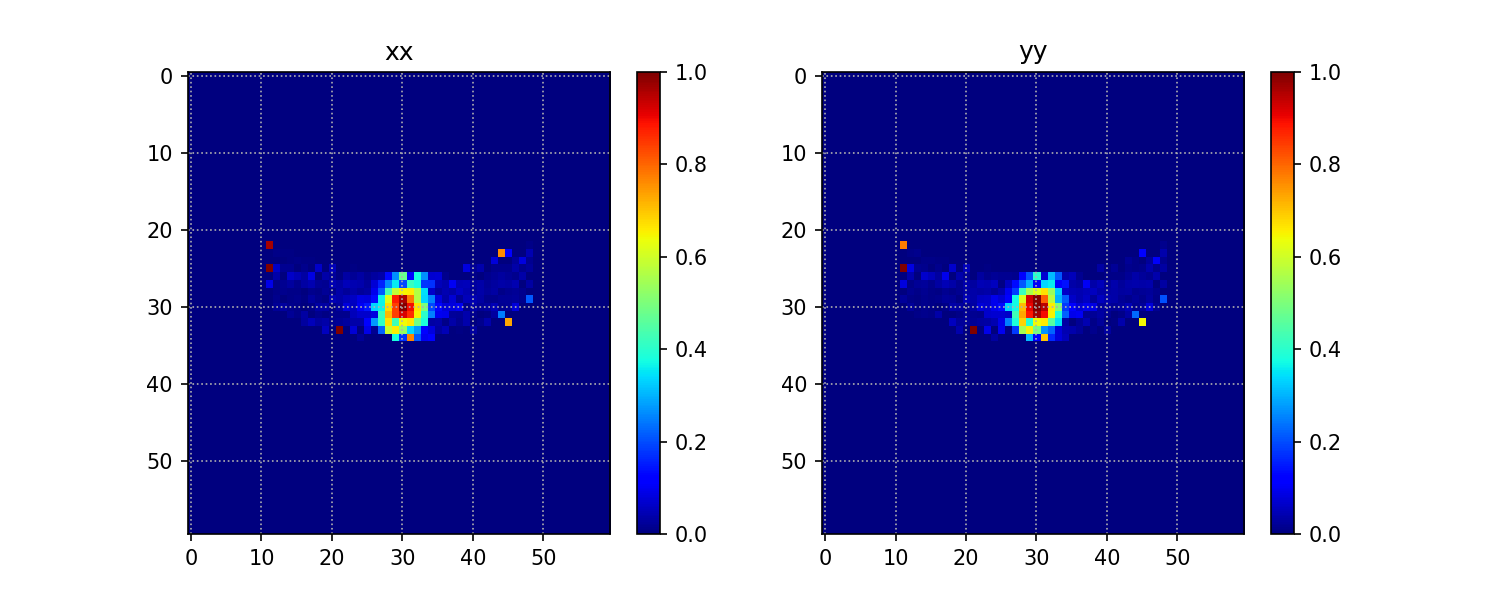

In [6]:
obsbeam_xx = bmss_xx.eval_sol(sol_xx)
obsbeam_yy = bmss_yy.eval_sol(sol_yy)

pylab.figure(figsize=(10,4))
pylab.subplot(121)
pylab.title('xx')
pylab.imshow(obsbeam_xx.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

pylab.subplot(122)
pylab.title('yy')
pylab.imshow(obsbeam_yy.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')


In [7]:
clean_beam_xx = bmss_xx.remove_degen(bmss_xx.ls, obsbeam_xx, threshold=5e-4)
clean_beam_yy = bmss_xx.remove_degen(bmss_yy.ls, obsbeam_yy, threshold=5e-4)

Removing all eigen modes above 327
Removing all eigen modes above 327


<IPython.core.display.Javascript object>


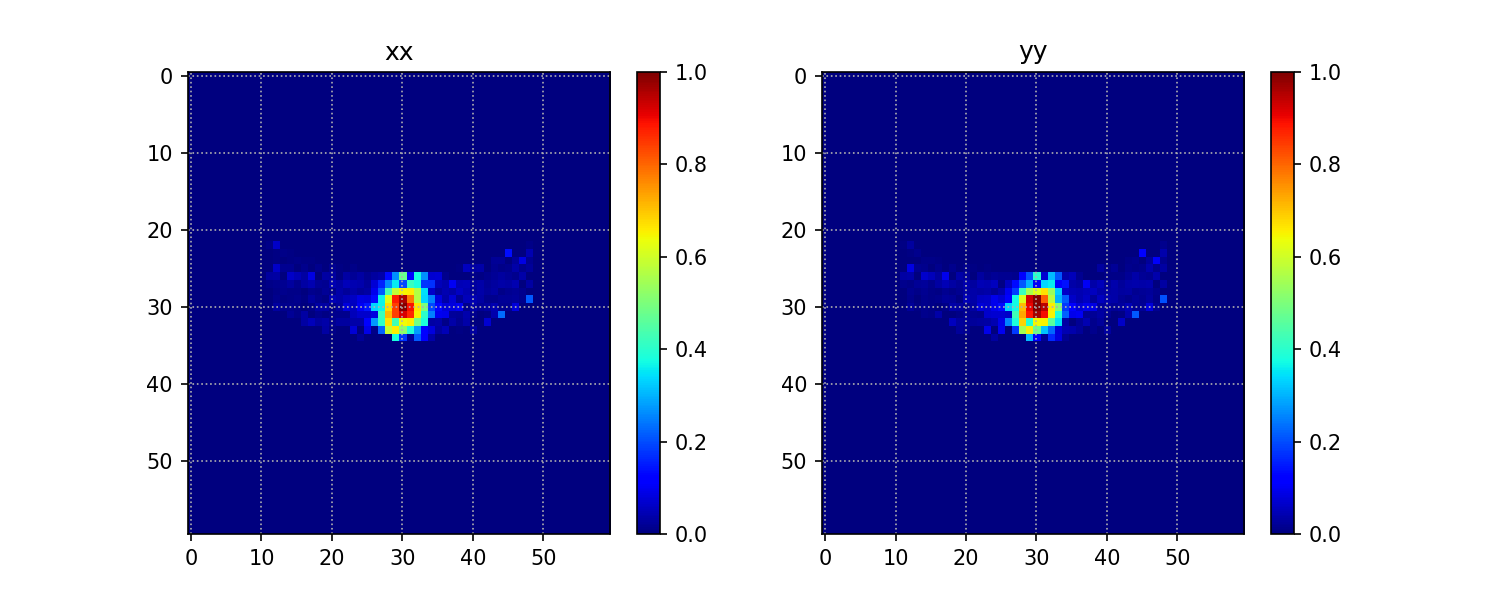

In [8]:
pylab.figure(figsize=(10,4))
pylab.subplot(121)
pylab.title('xx')
pylab.imshow(clean_beam_xx.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

pylab.subplot(122)
pylab.title('yy')
pylab.imshow(clean_beam_yy.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')


# Beam Rotation

In [9]:
%autoreload
catd_pol = cd.catData()
catd_pol.read_hdf5('polsrcd.h5')

catalog_flux_xx = catd_pol.calc_catalog_flux(beam_xx, 'xx')
catalog_flux_yy = catd_pol.calc_catalog_flux(beam_yy, 'yy')

In [10]:
%autoreload
bms_xx = bs.BeamSolve(catd_pol, bm_pix=60)
bmss_xx = bms_xx.beamsolver(cross=True)
bmss_xx.construct_linear_sys(catalog_flux_xx=catalog_flux_xx, catalog_flux_yy=catalog_flux_yy, theta_xx=[0], theta_yy=[np.pi/2], flip_yy=[-1])
sol_xx = bmss_xx.ls.solve(verbose=True)

bms_yy = bs.BeamSolve(catd_pol, bm_pix=60)
bmss_yy = bms_yy.beamsolver(cross=True)
bmss_yy.construct_linear_sys(catalog_flux_xx=catalog_flux_xx, catalog_flux_yy=catalog_flux_yy, theta_xx=[np.pi/2], theta_yy=[0], flip_xx=[-1])
sol_yy = bmss_yy.ls.solve(verbose=True)

Solving 0/1
Solving 0/1


<IPython.core.display.Javascript object>


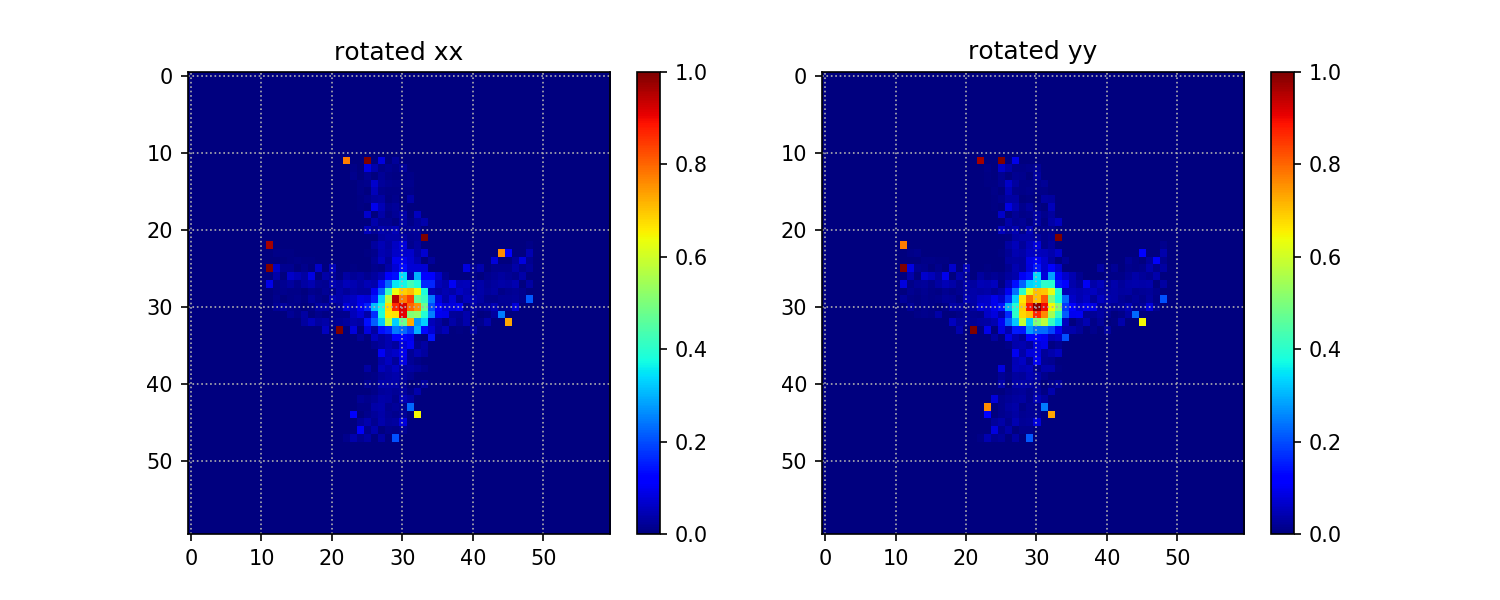

In [11]:
obsbeam_xx = bmss_xx.eval_sol(sol_xx)
obsbeam_yy = bmss_yy.eval_sol(sol_yy)

pylab.figure(figsize=(10,4))
pylab.subplot(121)
pylab.title('rotated xx')
pylab.imshow(obsbeam_xx.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

pylab.subplot(122)
pylab.title('rotated yy')
pylab.imshow(obsbeam_yy.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

In [12]:
clean_beam_xx = bmss_xx.remove_degen(bmss_xx.ls, obsbeam_xx, threshold=5e-4)
clean_beam_yy = bmss_xx.remove_degen(bmss_yy.ls, obsbeam_yy, threshold=5e-4)

Removing all eigen modes above 567
Removing all eigen modes above 567


<IPython.core.display.Javascript object>


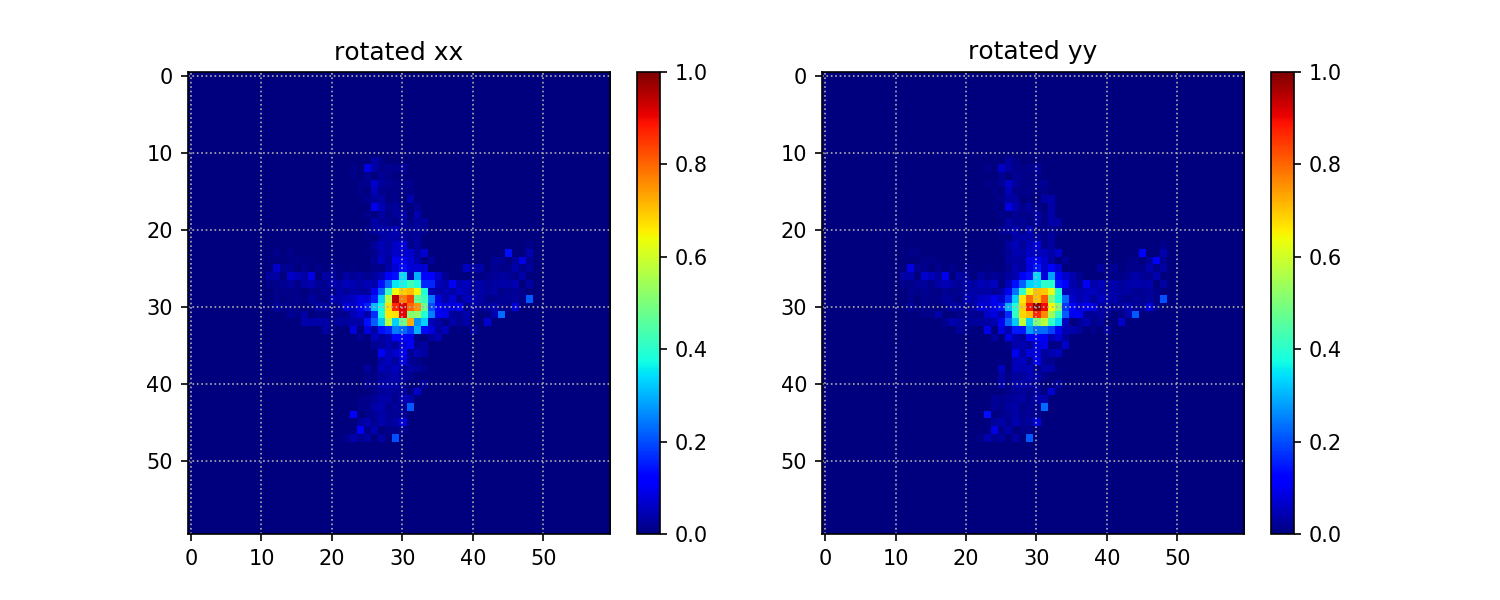

In [13]:
pylab.figure(figsize=(10,4))
pylab.subplot(121)
pylab.title('rotated xx')
pylab.imshow(clean_beam_xx.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

pylab.subplot(122)
pylab.title('rotated yy')
pylab.imshow(clean_beam_yy.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

In [27]:
%autoreload
bvals = np.zeros((60, 60))
bms_xx = bs.BeamSolve(catd_pol, bm_pix=60)
bmss_xx = bms_xx.beamsolver(cross=True)
bmss_xx.construct_nonlinear_sys(catalog_flux_xx=catalog_flux_xx, catalog_flux_yy=catalog_flux_yy, beamvals=bvals, theta_xx=[0], theta_yy=[np.pi/2], flip_yy=[-1], constrain=True)

bvals = np.zeros((60, 60))
bms_yy = bs.BeamSolve(catd_pol, bm_pix=60)
bmss_yy = bms_yy.beamsolver(cross=True)
bmss_yy.construct_nonlinear_sys(catalog_flux_xx=catalog_flux_xx, catalog_flux_yy=catalog_flux_yy, beamvals=bvals, theta_xx=[np.pi/2], theta_yy=[0], flip_xx=[-1], constrain=True)

In [19]:
sol_xx = bmss_xx.ls.solve_iteratively(verbose=True)

Beginning iteration 1/50
Solving 0/1
Beginning iteration 2/50
Solving 0/1
Beginning iteration 3/50
Solving 0/1
Beginning iteration 4/50
Solving 0/1
Beginning iteration 5/50
Solving 0/1
Beginning iteration 6/50
Solving 0/1
Beginning iteration 7/50
Solving 0/1
Beginning iteration 8/50
Solving 0/1
Beginning iteration 9/50
Solving 0/1
Beginning iteration 10/50
Solving 0/1
Beginning iteration 11/50
Solving 0/1
Beginning iteration 12/50
Solving 0/1
Beginning iteration 13/50
Solving 0/1
Beginning iteration 14/50
Solving 0/1
Beginning iteration 15/50
Solving 0/1
Beginning iteration 16/50
Solving 0/1
Beginning iteration 17/50
Solving 0/1
Beginning iteration 18/50
Solving 0/1
Beginning iteration 19/50
Solving 0/1
Beginning iteration 20/50
Solving 0/1
Beginning iteration 21/50
Solving 0/1
Beginning iteration 22/50
Solving 0/1
Beginning iteration 23/50
Solving 0/1
Beginning iteration 24/50
Solving 0/1
Beginning iteration 25/50
Solving 0/1
Beginning iteration 26/50
Solving 0/1
Beginning iteration 2

In [28]:
sol_yy = bmss_yy.ls.solve_iteratively(verbose=True)

Beginning iteration 1/50
Solving 0/1
Beginning iteration 2/50
Solving 0/1
Beginning iteration 3/50
Solving 0/1
Beginning iteration 4/50
Solving 0/1
Beginning iteration 5/50
Solving 0/1
Beginning iteration 6/50
Solving 0/1
Beginning iteration 7/50
Solving 0/1
Beginning iteration 8/50
Solving 0/1
Beginning iteration 9/50
Solving 0/1
Beginning iteration 10/50
Solving 0/1
Beginning iteration 11/50
Solving 0/1
Beginning iteration 12/50
Solving 0/1
Beginning iteration 13/50
Solving 0/1
Beginning iteration 14/50
Solving 0/1
Beginning iteration 15/50
Solving 0/1
Beginning iteration 16/50
Solving 0/1
Beginning iteration 17/50
Solving 0/1
Beginning iteration 18/50
Solving 0/1
Beginning iteration 19/50
Solving 0/1
Beginning iteration 20/50
Solving 0/1
Beginning iteration 21/50
Solving 0/1
Beginning iteration 22/50
Solving 0/1
Beginning iteration 23/50
Solving 0/1
Beginning iteration 24/50
Solving 0/1
Beginning iteration 25/50
Solving 0/1
Beginning iteration 26/50
Solving 0/1
Beginning iteration 2

In [30]:
flux_xx, obsbeam_xx = bmss_xx.eval_nonlinear_sol(sol_xx)
flux_yy, obsbeam_yy = bmss_xx.eval_nonlinear_sol(sol_yy)

<IPython.core.display.Javascript object>


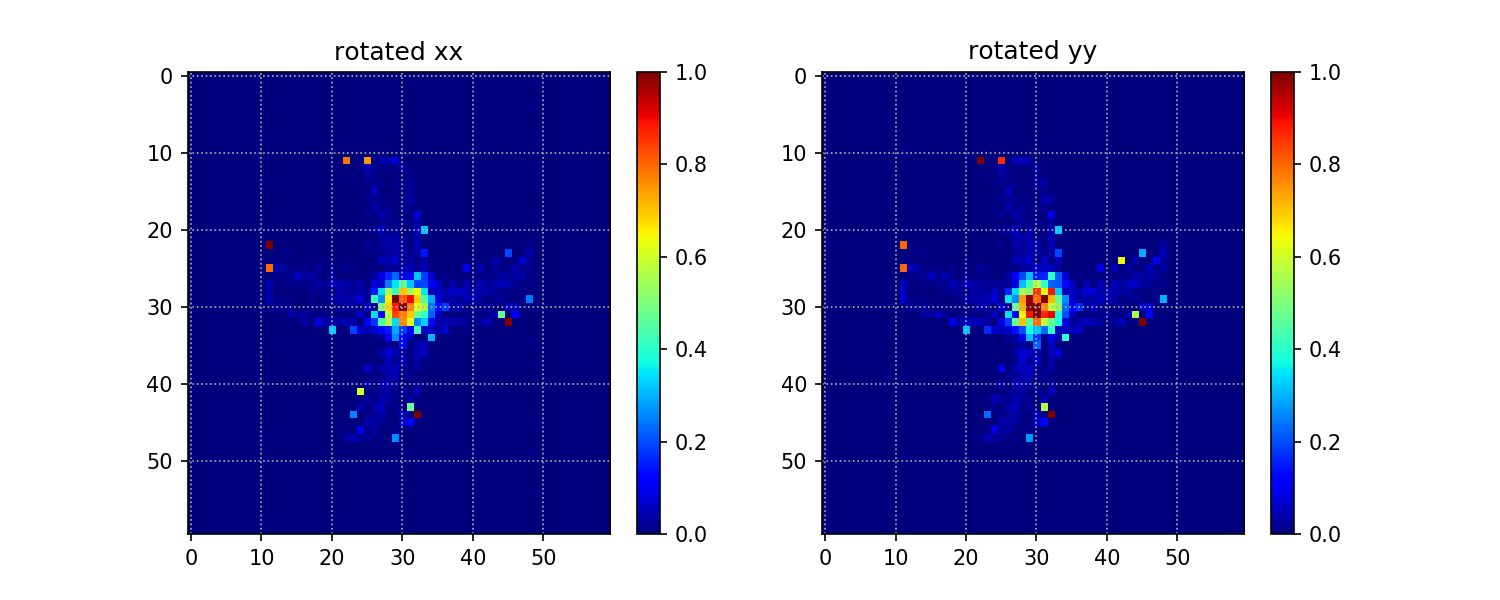

In [32]:
pylab.figure(figsize=(10,4))
pylab.subplot(121)
pylab.title('rotated xx')
pylab.imshow(obsbeam_xx.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

pylab.subplot(122)
pylab.title('rotated yy')
pylab.imshow(obsbeam_yy.T, aspect='auto', cmap='jet', vmin=0, vmax=1.0)
pylab.colorbar()
pylab.grid(ls='dotted')

In [44]:
clean_beam_xx = bmss_xx.remove_degen(bmss_xx.ls.ls, obsbeam_xx, threshold=2e-1)
clean_beam_yy = bmss_xx.remove_degen(bmss_yy.ls.ls, obsbeam_yy, threshold=2e-1)

Removing all eigen modes above 53
Removing all eigen modes above 54


In [56]:
A = bmss_xx.get_A(bmss_xx.ls.ls)
print A.shape

(5021, 720, 1)


In [57]:
U, S, V = bmss_xx.svd(A)

<IPython.core.display.Javascript object>


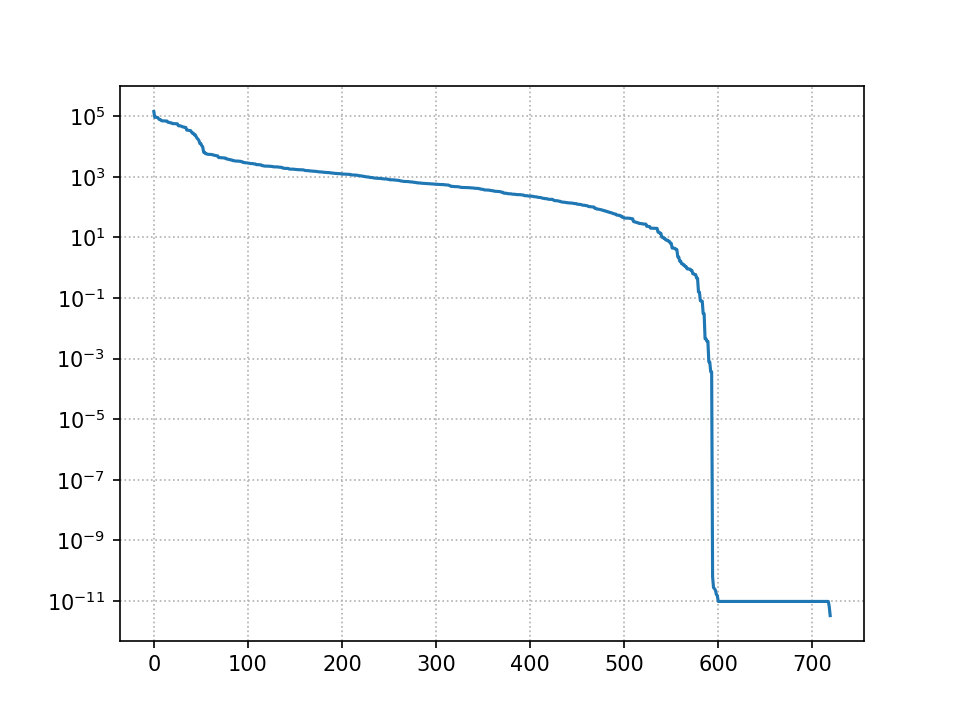

In [60]:
pylab.semilogy(S)
pylab.grid(ls='dotted')

In [63]:
bm_pix = 31
for i in xrange(500, len(S)):
    emode = np.array([U[bmss_xx.ls.ls.prm_order['b%d' % px], i] if bmss_xx.ls.ls.prm_order.has_key('b%d'%px) else 0 for px in xrange(bm_pix**2)])
    emode.shape = (self.bm_pix, self.bm_pix)
    obsbeam -= np.sum(obsbeam * emode) * emode.conj()